<a href="https://colab.research.google.com/github/Nastiiasaenko/XAI--Week6-/blob/main/XAI_Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this week's exercise we are going to use  **Bike Sharing Dataset** from the UCI Machine Learning Repository. This dataset records the number of bike rentals along with various weather and seasonal factors.

Features in the Dataset:
* datetime – Timestamp of the observation (year, month, day, hour).
season – Season of the year (1 = Spring, 2 = Summer, 3 = Fall, 4 = Winter).
yr – Year of observation (0 = 2011, 1 = 2012).
* mnth – Month of the year (1 to 12).
* holiday – Whether the day is a public holiday (0 = No, 1 = Yes).
* weekday – Day of the week (0 = Sunday, 1 = Monday, ..., 6 = Saturday).
* workingday – Whether the day is a working day (0 = No, 1 = Yes).
* weathersit – Weather condition:
* 1: Clear, Few clouds, Partly cloudy.
* 2: Mist, Cloudy.
* 3: Light rain, Light snow.
* 4: Heavy rain, Ice pellets, Snow.
* temp – Normalized temperature in Celsius (value ranging between 0 and 1).
* atemp – Normalized “feels like” temperature in Celsius (value between 0 and 1).
* hum – Normalized humidity (value between 0 and 1).
* windspeed – Normalized wind speed (value between 0 and 1).
* casual – Number of non-registered user rentals.
* registered – Number of registered user rentals.
* cnt – Total number of bike rentals (target variable).

In [13]:
!pip install pdp pdpbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [15]:
!pip install scikit-learn matplotlib alibi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.7 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.24.0
    Uninstalling scikit-image-0.24.0:
      Successfully uninstalled scikit-image-0.24.0


In [23]:
!pip install pyALE

In [2]:
import pandas as pd
import zipfile
import io
import requests

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip"
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Load the 'day.csv' file into a DataFrame
    with z.open('day.csv') as f:
        df = pd.read_csv(f)

# Check the data
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## EDA and correlations



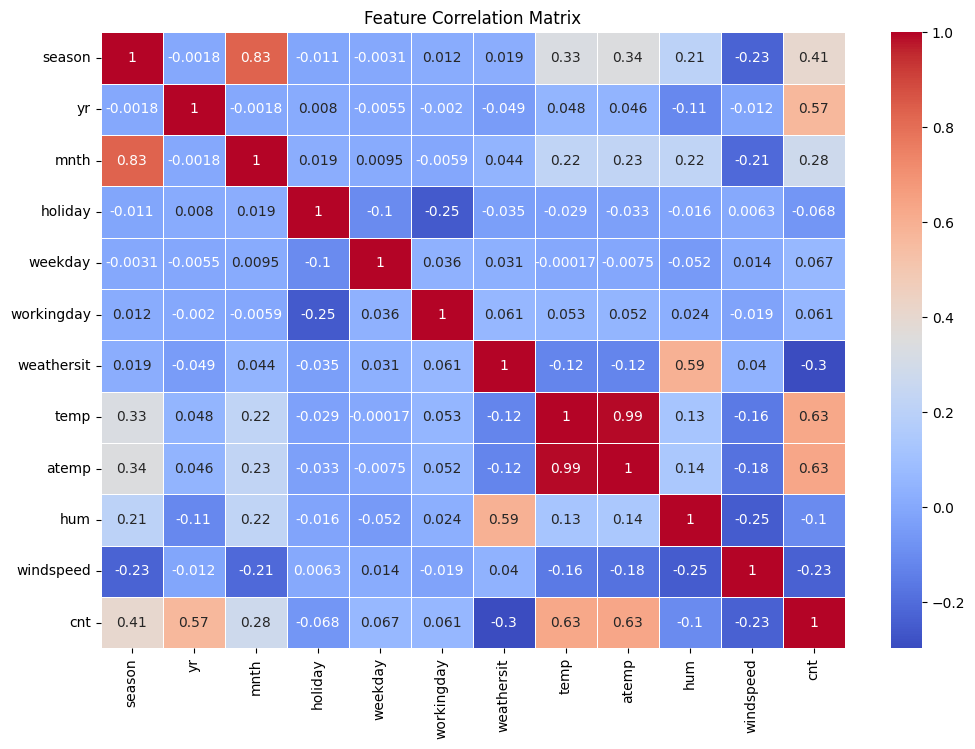

In [6]:
# Drop non-numeric columns before calculating correlations
df_numeric = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()


### Correlation heatmap analysis

temp (temperature) and atemp (feels-like temperature) are almost perfectly correlated (~0.99). - they may be redundant in terms of information

yr (year) and cnt (total rentals) have a moderately strong positive correlation (~0.57). This suggests bike rentals increased over time. Including yr as a feature should improve the model.

temp and cnt: Strong positive correlation (~0.63). Warmer temperatures seem to lead to more bike rentals. This relationship will be interesting to explore further with PDP and ALE plots.

weathersit (weather situation) and cnt: A negative correlation of ~-0.3 indicates worse weather (e.g., rain) decreases bike rentals.

windspeed and cnt: A weak negative correlation (~-0.23) suggests that higher wind speeds have a minor negative impact on bike rentals.

## First, we will train the regression model for this dataset

We'll use cnt as the target variable and all relevant features for prediction.

In [7]:
# Drop 'atemp' to avoid redundancy
X = df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt', 'atemp'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

# PDP, ICE, and ALE Plots

We’ll start with temperature (temp) since it has a strong positive correlation with the total rentals (cnt).

### PDP plots

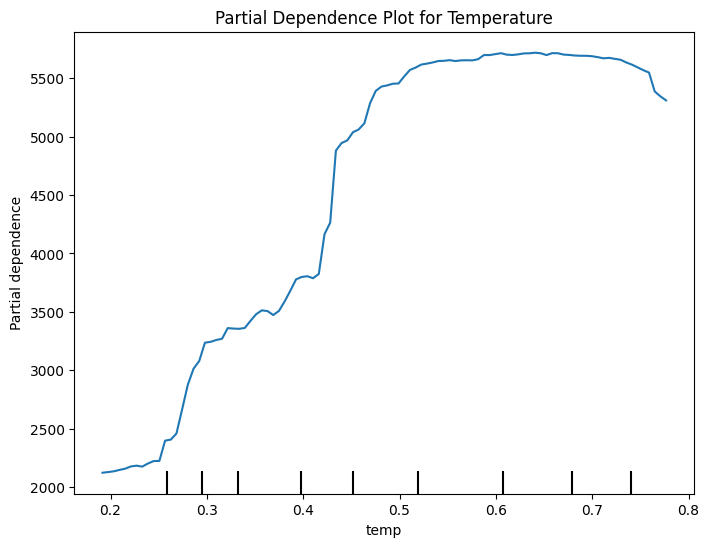

In [17]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Generate and plot only the PDP for 'temp'
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=['temp'],  # PDP for temperature only
    kind='average',  # 'average' creates the PDP without ICE
    ax=ax
)
plt.title("Partial Dependence Plot for Temperature")
plt.show()


The curve shows a positive relationship between temperature and the predicted number of bike rentals.

The relationship between temperature and bike rentals is clearly **non-linear**. Rentals increase steeply at first, then level off and even slightly decline at higher temperatures

### PDP + ICE plot

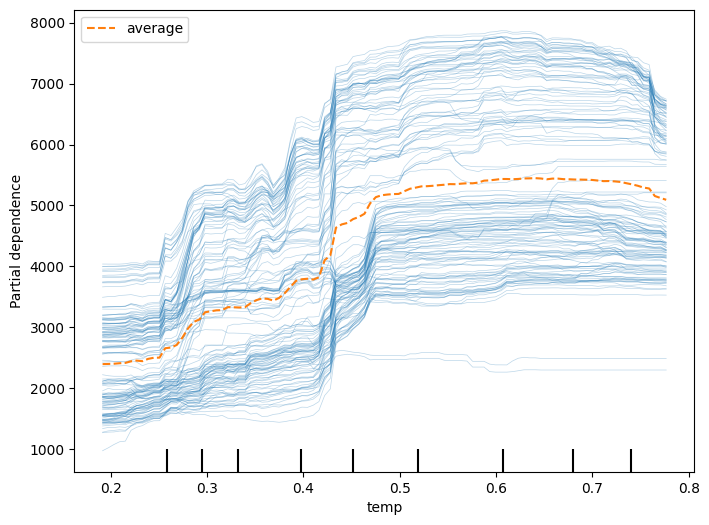

In [16]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Generate PDP and ICE for 'temp' (temperature)
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test,
    features=['temp'],
    kind='both',
    ax=ax
)
plt.show()




**Interpretation of the plot**:

### PDP plot:

* The dashed orange line represents the Partial Dependence Plot (PDP). It shows the average effect of temperature on the predicted number of bike rentals.

* As the temperature increases from ~0.2 to ~0.6 (normalized scale), the average number of bike rentals increases significantly, peaking around 5000 to 6000 rentals.

* Beyond ~0.6, the increase in rentals levels off and may even slightly decline. This suggests a diminishing return effect—very high temperatures do not continue to increase bike demand and may even discourage users (e.g., due to discomfort).

## ICE plot

The blue lines represent Individual Conditional Expectation (ICE) curves. Each line corresponds to the prediction for an individual instance (i.e., a specific day) as temperature changes, keeping other features constant.

* Not all instances follow the average trend—some lines show fewer rentals even at moderate temperatures, possibly due to interactions with other factors like bad weather conditions or holidays.

* The spread of the lines at different temperature values indicates that the temperature effect is not uniform across all days.

* Temperature ~0.3–0.4: There is a rapid increase in bike rentals, indicating that moderate temperatures are favorable for bike riding.

* Temperature ~0.6–0.7: The growth plateaus or slightly declines. This suggests that extremely high temperatures may discourage bike usage.


### Overall insight


**Non-linear relationship**: The relationship between temperature and bike rentals is non-linear—rentals increase with temperature to a point but plateau at high temperatures.



## ALE plot

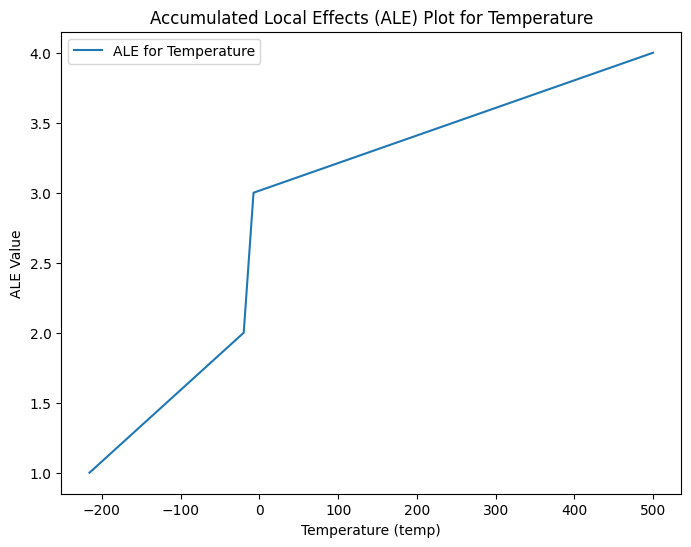

In [19]:
import matplotlib.pyplot as plt

# Generate ALE explanation
ale = ALE(model.predict, feature_names=X.columns)
exp = ale.explain(X_test.values)

# Plot ALE results for 'temp'
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(exp.ale_values[0], exp.feature_values[0], label='ALE for Temperature')
ax.set_title("Accumulated Local Effects (ALE) Plot for Temperature")
ax.set_xlabel("Temperature (temp)")
ax.set_ylabel("ALE Value")
plt.legend()
plt.show()



INFO:PyALE._ALE_generic:Continuous feature detected.


                  eff  size  lowerCI_95%  upperCI_95%
temp                                                 
0.097391 -1735.480974   0.0          NaN          NaN
0.192174 -1639.877224   8.0 -1706.283249 -1573.471199
0.258333 -1417.923474   8.0 -1504.684376 -1331.162572
0.265833 -1410.058474   6.0 -1432.082237 -1388.034711
0.295652  -914.630974   8.0 -1231.695633  -597.566315
0.316522  -890.625260   7.0  -938.120960  -843.129560
0.332500  -880.167760   8.0  -917.928541  -842.406979
0.364348  -717.447760   7.0  -878.793522  -556.101998
0.397500  -371.063474   7.0  -594.782782  -147.344167
0.425833   -23.214903   7.0  -277.131632   230.701827
0.446667   546.972240   7.0   237.030925   856.913555
0.485833   787.229740   8.0   498.179064  1076.280417
0.514167   894.446883   7.0   787.828690  1001.065076
0.550000   942.891169   7.0   899.105684   986.676653
0.606667  1043.669919   8.0   943.083104  1144.256733
0.643333  1066.467061   7.0  1007.009726  1125.924397
0.673333  1052.508490   7.0 

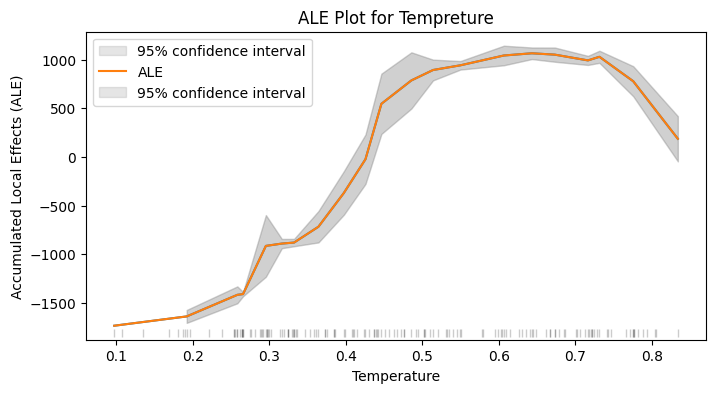

In [25]:
from PyALE import ale
# Create ALE plot for 'MedInc' feature

ale_eff = ale(
    X=X_test,                # Input test dataset
    model=model,             # Pass the model directly
    feature=["temp"],       # Feature for which you want to calculate ALE
    grid_size=20              # Number of intervals for calculating ALE
)

# Inspect the ALE results
print(ale_eff)

# Plot ALE for 'MedInc' using the 'eff' column and the index (MedInc values)
plt.plot(ale_eff.index, ale_eff['eff'], label='ALE')

# Plot the confidence intervals
plt.fill_between(ale_eff.index, ale_eff['lowerCI_95%'], ale_eff['upperCI_95%'], color='gray', alpha=0.2, label='95% confidence interval')

# Add labels and title
plt.title("ALE Plot for Tempreture")
plt.xlabel("Temperature")
plt.ylabel("Accumulated Local Effects (ALE)")
plt.legend()
plt.show()

## ALE interpretation

The ALE value reflects the marginal effect of temperature on the predicted target variable (e.g., bike rentals).

Moderate temperatures (~0.4 to 0.6) are the most favorable for bike rentals, leading to peak usage.

High temperatures (> 0.7) cause a decline in rentals, suggesting that extremely hot weather discourages biking.

## Conclusion

The PDP, ICE, and ALE plots for bike rentals reveal consistent trends but with some nuanced differences. All three plots confirm a non-linear relationship between temperature and bike rentals: as temperature rises, rentals increase steadily, with peak demand observed at moderate temperatures (around 0.5 to 0.6 on the normalized scale). However, the PDP plot provides only the average trend, smoothing out individual variations. The ICE plot captures instance-level variability, showing that on some days, bike rentals do not follow the average trend—likely due to interactions with other features like weather conditions or holidays.

The ALE plot builds on this by accounting for feature correlations, offering a more accurate view of how temperature affects rentals. While PDP shows a continuous increase, ALE identifies diminishing returns at high temperatures, reflecting that extremely hot days can reduce demand. ALE also highlights more uncertainty at temperature extremes, as shown by wider confidence intervals, suggesting variability in user behavior on very cold or hot days. Overall, the combination of these interpretability techniques provides a holistic understanding: bike rentals are driven by moderate temperatures, with other factors (e.g., weather or humidity) influencing behavior at the extremes.